In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta, date

In [2]:
main_df = pd.read_csv('../data/datatypes_cleaned.csv')
main_df.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_68276/4165977244.py:1: DtypeWarning: Columns (2,3,5,7,8,9,10,47) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('../data/datatypes_cleaned.csv')


,ZIP,Households (Count),White (Count),Black or African American (Count),American Indian and Alaska Native (Count),Asian (Count),Native Hawaiian and Other Pacific Islander (Count),Some other race (Count),Two or more races (Count),Hispanic or Latino origin (of any race) (Count),...,Latitude,Longitude,Mapped Location,Time to Resolve,Hours to Resolve,Days to Resolve,Neighborhood,Income Bracket,Minority Population %,Minority % Bracket
0,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25,119.156944,4.964873,Antioch / Cane Ridge,"$60,000 - $80,000",58.6,40-60%
1,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.072191,-86.664342,"(36.07219072, -86.66434192)",2 days 16:16:00,64.266667,2.677778,Antioch / Cane Ridge,"$60,000 - $80,000",58.6,40-60%
2,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.050526,-86.606362,"(36.05052579, -86.60636223)",35 days 15:25:00,855.416667,35.642361,Antioch / Cane Ridge,"$60,000 - $80,000",58.6,40-60%
3,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.073930,-86.609670,"(36.07393, -86.60967)",7 days 00:04:00,168.066667,7.002778,Antioch / Cane Ridge,"$60,000 - $80,000",58.6,40-60%
4,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.044549,-86.612186,"(36.0445494, -86.6121858)",1 days 04:29:00,28.483333,1.186806,Antioch / Cane Ridge,"$60,000 - $80,000",58.6,40-60%


In [3]:
main_df['Income Bracket'].value_counts()

$60,000 - $80,000     354002
$40,000 - $60,000     238725
More Than $100,000     73329
$80,000 - $100,000     55970
Name: Income Bracket, dtype: int64

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722026 entries, 0 to 722025
Data columns (total 58 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   ZIP                                                                722026 non-null  int64  
 1   Households (Count)                                                 722026 non-null  float64
 2   White (Count)                                                      722026 non-null  object 
 3   Black or African American (Count)                                  722026 non-null  object 
 4   American Indian and Alaska Native (Count)                          722026 non-null  float64
 5   Asian (Count)                                                      722026 non-null  object 
 6   Native Hawaiian and Other Pacific Islander (Count)                 722026 non-null  float64
 7   Some other 

In [5]:
print(main_df['Request Type'].value_counts().to_string())

Trash, Recycling & Litter                          317972
Streets, Roads & Sidewalks                         171776
Public Safety                                       81498
Property Violations                                 62232
Resolved by hubNashville on First Call              37773
COVID-19                                            14038
Electric & Water General                            13642
Transit                                             10943
Other Metro Services and Forms                       4134
Parks                                                2511
Permits                                              2450
Hands On Volunteers                                  1574
Planning & Zoning                                     462
Other                                                 421
Trees                                                 308
Storm Relief                                          181
Public Records Request                                 30
Reopening Safe

In [ ]:
print(main_df['Subrequest Type'].value_counts().to_string())

In [7]:
print(main_df['Additional Subrequest Type'].value_counts().to_string())

Trash - Curbside/Alley Missed Pickup                                           69971
Control Number Request for Towing                                              51256
Roadway                                                                        41705
Recycle - Curbside/Alley Missed Pickup                                         38307
Resolved by hubNashville on First Call                                         37768
Trash - Report a Damaged Cart                                                  33340
Recycling - Request an Additional Cart                                         19678
Blocking the Right of Way                                                      14936
Junk and Debris                                                                13898
COVID-19 Violations                                                            13426
Damaged Sign                                                                   12554
Trash in Recycling Cart                                          

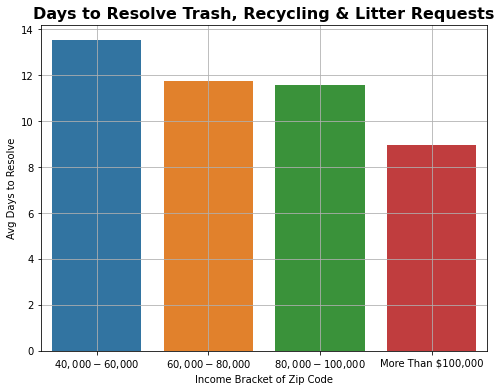

In [8]:
def trash_mean(main_df):
    return main_df['Days to Resolve'].mean()
request_trash = main_df.loc[(main_df['Request Type'] == 'Trash, Recycling & Litter')]
trash_groups = request_trash.groupby(['Income Bracket']).apply(trash_mean)
trash_groups = trash_groups.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Income Bracket', y = 0, data = trash_groups)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Income Bracket of Zip Code')
plt.title('Days to Resolve Trash, Recycling & Litter Requests', weight = 'bold', fontsize = 16)
plt.grid();

In [9]:
main_df.groupby(['Request Type'])['Closed When Created'].value_counts()

Request Type                                     Closed When Created
2nd Avenue Explosion Information and Assistance  False                      10
COVID-19                                         False                   14030
                                                 True                        8
Education & Libraries                            False                      17
Electric & Water General                         False                   13618
                                                 True                       24
Hands On Volunteers                              False                    1573
                                                 True                        1
OEMGURAIL                                        False                      13
OEMSTRUCT                                        False                       1
OEMTREE                                          False                       2
Other                                            False        

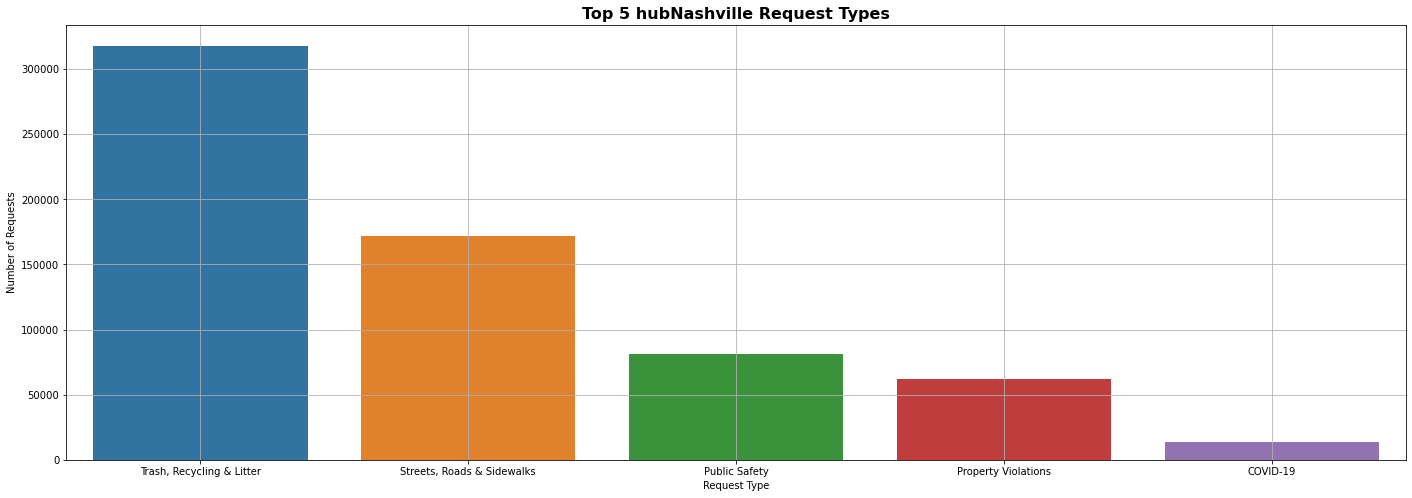

In [10]:
top_requests = main_df.loc[(main_df['Request Type'] != 'Resolved by hubNashville on First Call')]
plt.figure(figsize = (24,8))
sns.countplot(x = 'Request Type', data = top_requests, order = pd.value_counts(top_requests['Request Type']).iloc[:5].index)
plt.ylabel('Number of Requests')
plt.title('Top 5 hubNashville Request Types', weight = 'bold', size = 16)
plt.grid();
# requests_top_10 = top_requests['Request Type'].value_counts().nlargest(10)
# def count_requests(main_df):
#     return main_df['Request Type'].value_counts()
# requests_top_10_bars = main_df.groupby(['Request Type']).apply(count_requests).nlargest(10)
# requests_top_10_bars = requests_top_10_bars.reset_index()
# requests_top_10_bars

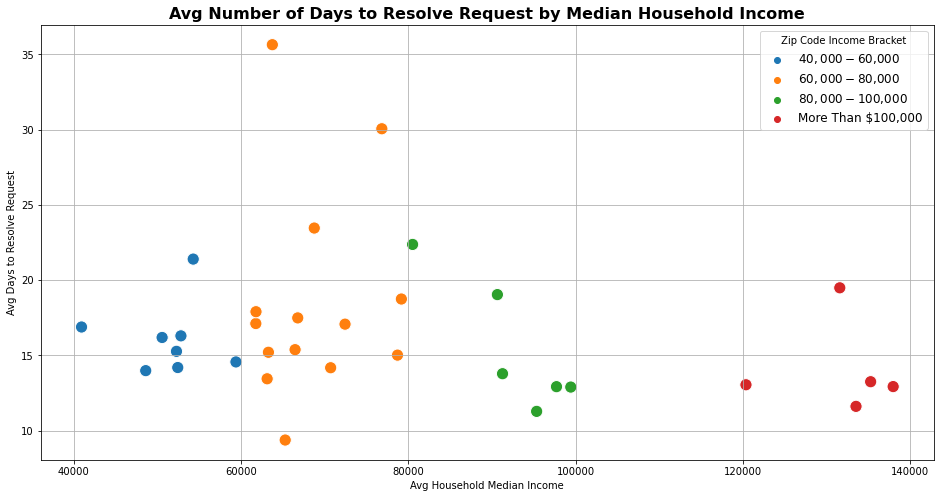

In [23]:
def avg_resp_time(main_df):
    return main_df['Days to Resolve'].mean()
avg_response_time_zip = main_df.groupby(['Households (Median Income)', 'Income Bracket']).apply(avg_resp_time)
avg_response_time_zip = avg_response_time_zip.reset_index()
avg_response_time_zip.head()
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'Households (Median Income)', y = 0, hue = 'Income Bracket', data = avg_response_time_zip, s = 150)
plt.ylabel('Avg Days to Resolve Request')
plt.xlabel('Avg Household Median Income')
plt.title('Avg Number of Days to Resolve Request by Median Household Income', weight = 'bold', fontsize = 16)
plt.legend(title = 'Zip Code Income Bracket', fontsize = 12)
plt.grid();

In [12]:
main_df['Minority Population %'].value_counts()

31.1    74870
58.6    68662
37.7    65905
74.0    50040
32.8    48384
63.1    40019
38.7    35983
52.3    35596
27.6    32954
8.9     30777
53.7    29445
10.6    27150
27.4    26786
48.1    25809
18.8    20749
21.8    20628
81.9    20541
14.5    12339
13.2    11753
14.4     8339
16.6     7515
16.4     7457
3.8      6579
26.9     5084
49.0     3506
13.6     2163
60.3     1292
14.3      484
47.4      396
8.1       345
3.9       247
15.4      229
Name: Minority Population %, dtype: int64

In [13]:
main_df['Minority % Bracket'].value_counts()

20-40%     310594
40-60%     163414
0-20%      136126
60-80%      91351
80-100%     20541
Name: Minority % Bracket, dtype: int64

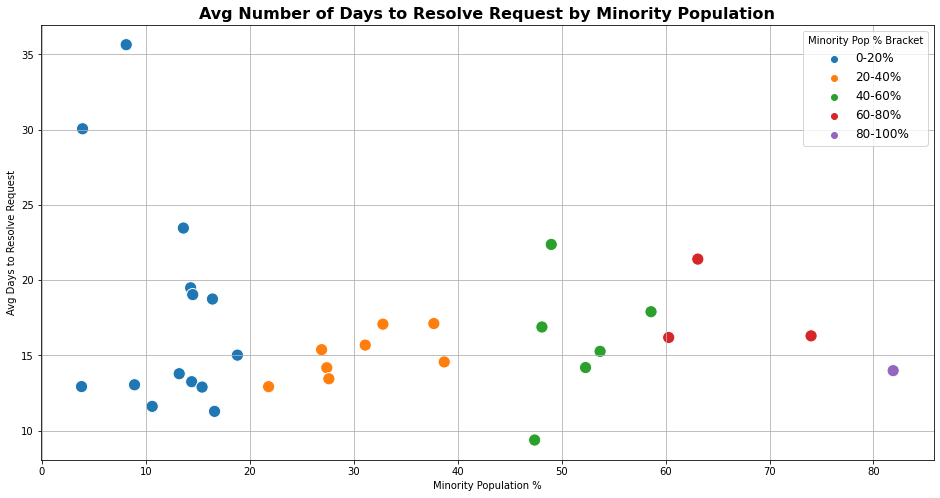

In [18]:
avg_response_time_minority = main_df.groupby(['Minority Population %', 'Minority % Bracket']).apply(avg_resp_time)
avg_response_time_minority = avg_response_time_minority.reset_index()
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'Minority Population %', y = 0, hue = 'Minority % Bracket', data = avg_response_time_minority, s = 150)
plt.ylabel('Avg Days to Resolve Request')
plt.title('Avg Number of Days to Resolve Request by Minority Population', weight = 'bold', fontsize = 16)
plt.legend(title = 'Minority Pop % Bracket', fontsize = 12)
plt.grid();

In [16]:
main_df.groupby(['ZIP', 'Neighborhood'])['Days to Resolve'].mean()

ZIP    Neighborhood                                                                
37013  Antioch / Cane Ridge                                                            17.901836
37015  Ashland City                                                                    35.644648
37027  Brentwood                                                                       13.250684
37072  Goodlettsville                                                                  15.379843
37076  Hermitage                                                                       17.490972
37080  Joelton                                                                         23.460781
37086  LaVergne                                                                         9.375116
37115  Madison                                                                         14.192328
37122  Mt Juliet / Gladeville                                                          12.894327
37135  Nolensville                         

In [21]:
main_df.groupby(['Request Type'])['Days to Resolve'].mean().sort_values(ascending = False)

Request Type
Social Services & Housing                          565.105637
Education & Libraries                              361.559871
Property Violations                                 43.602335
Hands On Volunteers                                 33.859228
Streets, Roads & Sidewalks                          24.541266
Planning & Zoning                                   22.547662
2nd Avenue Explosion Information and Assistance     20.366875
Electric & Water General                            18.962109
Public Records Request                              18.426742
Other Metro Services and Forms                      11.929725
Trash, Recycling & Litter                           11.906621
Transit                                              9.528249
Parks                                                7.688574
Permits                                              7.170684
Storm Relief                                         6.217518
Other                                                4.96

In [28]:
main_df.groupby(['Request Type'], as_index = False).agg({'Days to Resolve':['mean'], 'Request #':['count']})

,Request Type,Days to Resolve,Request #
,,mean,count
0,2nd Avenue Explosion Information and Assistance,20.366875,10
1,COVID-19,2.328922,14038
2,Education & Libraries,361.559871,17
3,Electric & Water General,18.962109,13642
4,Hands On Volunteers,33.859228,1574
5,OEMGURAIL,0.257949,13
6,OEMSTRUCT,0.001586,1
7,OEMTREE,0.271730,2
8,Other,4.961427,421


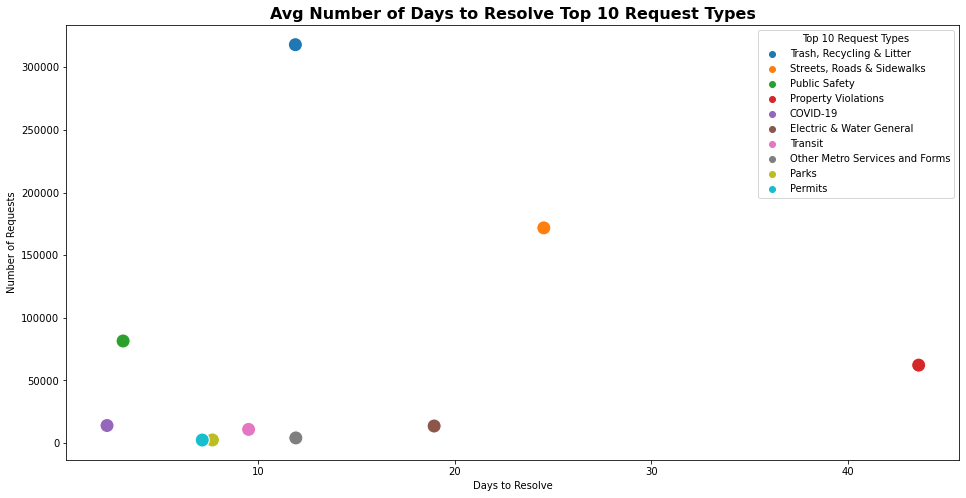

In [91]:
top_requests_resolve = top_requests.groupby(['Request Type'], as_index = False)['Days to Resolve'].mean()
top_requests_count = top_requests.groupby(['Request Type'], as_index = False)['Request #'].count()
top_requests_resolve_count = top_requests_resolve.merge(top_requests_count, left_on = 'Request Type', right_on = 'Request Type')
top10_requests = top_requests_resolve_count.nlargest(10, 'Request #')

types = top10_requests['Request Type']
days = top10_requests['Days to Resolve']
count = top10_requests['Request #']

plt.figure(figsize = (16,8))
sns.scatterplot(x = 'Days to Resolve', y = 'Request #', hue = 'Request Type', data = top10_requests, s = 200)
plt.ylabel('Number of Requests')
plt.legend(title = 'Top 10 Request Types')
plt.title('Avg Number of Days to Resolve Top 10 Request Types', weight = 'bold', fontsize = 16);

# for i, label in enumerate(top10_requests['Request Type']):
    # plt.annotate(label, (types.days,iat[i], types.count.iat[i]))


# sns.barplot(x = 'Days to Resolve', y = 'Request #', data = top_requests_resolve_count, order = top_requests_resolve_count.sort_values('Request #', ascending = False)['Days to Resolve'])

# top_requests_resolve_count10 = top_requests_resolve_count.groupby[('Request Type', 'Days to Resolve')]['Request #'].nlargest(10).reset_index()

#sns.countplot(x = 'Days to Resolve', data = top_requests_resolve_count, order = pd.value_counts(top_requests_resolve_count['Request #']).iloc[:10].index);


In [100]:
main_df.groupby(['Neighborhood', 'Households (Count)'])['Request #'].count()

Neighborhood                                                                  Households (Count)
12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill             6632.0                20628
Airport / Donelson                                                            14203.0               32954
Antioch / Cane Ridge                                                          35483.0               68662
Ashland City                                                                  7047.0                  345
Belle Meade / Forest Hills / Green Hills                                      10345.0               27150
Belle Meade / West End / West Meade                                           11588.0               30777
Bellevue                                                                      18388.0               12339
Belmont / Hillsboro Village / Music Row / Vanderbilt                          6896.0                20749
Bordeaux                                               

In [ ]:
del main_df['Requests Per Household']

In [ ]:
main_df.info()

In [108]:
neighborhood_requests = main_df.groupby(['Neighborhood', 'Households (Count)'], as_index = False)['Request #'].count()
neighborhood_requests['Requests Per Household'] = neighborhood_requests['Request #'] / neighborhood_requests['Households (Count)']
neighborhood_requests

,Neighborhood,Households (Count),Request #,Requests Per Household
0,12 South / Belmont / Lipscomb / Green Hills / ...,6632.0,20628,3.110374
1,Airport / Donelson,14203.0,32954,2.320214
2,Antioch / Cane Ridge,35483.0,68662,1.935067
3,Ashland City,7047.0,345,0.048957
4,Belle Meade / Forest Hills / Green Hills,10345.0,27150,2.624456
5,Belle Meade / West End / West Meade,11588.0,30777,2.655937
6,Bellevue,18388.0,12339,0.671035
7,Belmont / Hillsboro Village / Music Row / Vand...,6896.0,20749,3.008846
8,Bordeaux,5877.0,20541,3.495151
9,Bradford Hills / Brentioch / Cane Ridge / Crie...,29394.0,65905,2.242124
